# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

**ABOUT ZOMATO:**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city.

This Analysis solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**PROBLEM STATEMENT**

 -  Analyze the sentiments of the reviews given by the customer in the data and to draw useful conclusion in the form of Visualizations.

-  Cluster the zomato restaurants into different segments.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
names_df=pd.read_csv("/content/drive/MyDrive/Data_Science/Capstone_Projects/unsupervised Learning/Zomato Restaurant names and Metadata.csv") # load the Restaurent details
review_df=pd.read_csv("/content/drive/MyDrive/Data_Science/Capstone_Projects/unsupervised Learning/Zomato Restaurant reviews.csv") # load the restaurent review details

### Dataset First View

In [ ]:
# Dataset First Look
names_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#first five rows
review_df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("The Shape of the restaurent dataset is ", names_df.shape)
print("The shape of the review dataset is",review_df.shape)

The Shape of the restaurent dataset is  (105, 6)
The shape of the review dataset is (10000, 7)


### Dataset Information

In [ ]:
# Dataset Info - Restaurent dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
#checking for Null value - review dataset
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count- - Restaurent dataset
names_df.duplicated().sum()

0

In [ ]:
# Dataset Duplicate Value Count - review dataset
review_df.duplicated().sum()

36

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count - Restaurent dataset
names_df.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Missing Values/Null Values Count - review dataset
review_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
# Visualizing the missing values
names_df[names_df['Collections'].isna()].head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


In [ ]:
# Visualizing the missing values
names_df[names_df['Timings'].isna()].head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [ ]:
# Visualizing the missing values in review_df['Review']
review_df[review_df['Review'].isna()].head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0


In [ ]:
# Visualizing the missing values in review_df['Reviewer']
review_df[review_df['Reviewer'].isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


### What did you know about your dataset?

- we have been provided with two different dataset, names_df contains the zomato restaurent details and reviews_df contains the restaurent reviews.
- The shape of the restaurant dataset and review dataset is (105,6) and (10000,7)
- Duplicate Rows  - names_df , there are no duplicate rows in the dataset so we have the details of 105 restaurants.while in reviews_df contains 36 duplicate rows.
- Missing Values - names_df has 54 missing values in collections and 1 missing value in timings.In review_df , 38 missing values in Reviewer,Rating,Metadata,Time,Pictures and 45 missing values in reviews.

## ***2. Understanding Your Variables***

In [ ]:
# Check the columns in restarent and review dataset
print("The details available in the restaurant dataset are", names_df.columns)
print("\nThe details available in the review dataset are", review_df.columns)

The details available in the restaurant dataset are Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

The details available in the review dataset are Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [ ]:
# view the details of the restaurent dataset
names_df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# view the details of the review dataset
review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

**DATA DESCRIPTION:**


- Restaurant data - has valuable information around cuisine and costing which can be used in cost vs. benefit analysis
- Review Data - could be used for sentiment analysis.
- The metadata of reviewers can be used for identifying the critics in the industry

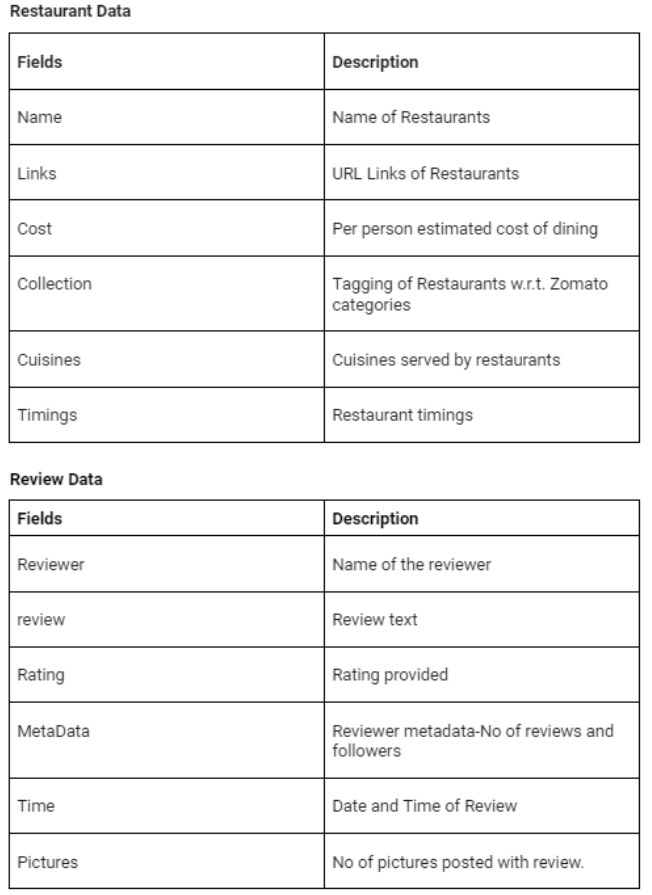

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in names_df.columns.tolist():
  print("No. of unique values in ",i,"is",names_df[i].nunique(),".")

for i in review_df.columns.tolist():
  print("No. of unique values in ",i,"is",review_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .
No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Let's convert Time column to DateTime
review_df['Time'] = pd.to_datetime(review_df['Time'])
review_df['Year'] = review_df['Time'].dt.year
review_df['Month'] = review_df['Time'].dt.month
review_df['Date'] = review_df['Time'].dt.day
review_df['Hour'] = review_df['Time'].dt.hour
review_df.drop(['Time'],axis = 1,inplace=True)

In [ ]:
# check for unique values in Rating 
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [ ]:
# correcting and changing the datatype of Rating Column
review_df[review_df['Rating'] =='Like'] = review_df[review_df['Rating'] !='Like'].Rating.median()
review_df['Rating'] = review_df['Rating'].astype('float')

In [ ]:
# Extract Reviews and Followers from Meta data
review_df['Reviews'],review_df['Followers']=review_df['Metadata'].str.split(',').str
review_df.drop(['Metadata'],axis = 1,inplace = True)
review_df['Reviews'] = review_df['Reviews'].str.split(' ').str[0].astype('float')
review_df['Followers'] = review_df['Followers'].str.split(' ').str[1].astype('float')
review_df

,Restaurant,Reviewer,Review,Rating,Pictures,Year,Month,Date,Hour,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019.0,5.0,25.0,15.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019.0,5.0,25.0,14.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019.0,5.0,24.0,22.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019.0,5.0,24.0,22.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019.0,5.0,24.0,21.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,0,2016.0,6.0,5.0,0.0,53.0,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,0,2016.0,6.0,4.0,22.0,2.0,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,3,2016.0,6.0,3.0,10.0,65.0,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,0,2016.0,5.0,31.0,17.0,13.0,144.0


In [ ]:
# convert the datatype from object to integer
names_df ['Cost'] = names_df ['Cost'].str.replace(',','').astype('int64')

### What all manipulations have you done and insights you found?

- Extracted the reviewer's details - No of reviews and followers.
- Extracted the day,month, year, from the review date

## ***4. Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in each feature
print(names_df.isna().sum())
print(review_df.isna().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
Restaurant       0
Reviewer        38
Review          45
Rating          38
Pictures         0
Year            38
Month           38
Date            38
Hour            38
Reviews         39
Followers     1617
dtype: int64


collections column has morethan 50% missing values, it will not be usefull for ML model. so drop the collections column from the dataframe

In [ ]:
# Handle the missing Values in names_df, drop the column 'Collections
names_df.drop(['Collections'],axis =1,inplace=True)

In [ ]:
# Handle the missing Values in names_df, view the columns 'Timings' has null values
names_df[names_df['Timings'].isna()]

,Name,Links,Cost,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,"Andhra, South Indian, North Indian",NaN


In [ ]:
# Names_df- replace the null values into '0'
names_df['Timings'].fillna(0,inplace=True)

In [ ]:
# Handle the missing Values in review_df, Replace the null values into 0 
review_df['Followers'].fillna(0,inplace=True)

In [ ]:
# Handle the missing values in review_df, Remove the rows with null values
review_df.dropna(axis=0,inplace=True)

In [ ]:
# check the shape of the dataframe,after handling the missing values 
print("The Shape of the restaurent dataset after handling the missing value is ", names_df.shape)
print("The shape of the review dataset after handling the missing value is",review_df.shape)

The Shape of the restaurent dataset after handling the missing value is  (105, 5)
The shape of the review dataset after handling the missing value is (9954, 11)


#### What all missing value imputation techniques have you used and why did you use those techniques?

- In Names_df, column 'Categories' has 45 null values out of 105 values. So the categories column will not be usefull for clustering, so it will not be considered for clustering.


- In Review_df, Column 'Followers' has 1617 null values out of 10000. which is around 10% so the null values are replaced as 0. In 'Reviews'Column there are 38 null values, it is 0.03% of total values available, so the rows with null values has been removed.

### 2. Handling Outliers

There are only 100 restaurent details and 10000 reviews.Treating outliers may reduce the available data. So, Skipping this part.

Answer Here.

### 3. Categorical Encoding

In the cuisines column each restaurant have combination of different cuisines served and we need to make dummy variable to respect restaurant for machine learning. the procedure followed as

1) store the all cuisines as list type w.r.t restaurant 

2) make a single list of all cuisine

3)create frequency of dictionary of cuisine present overall in dataset.

4)An attempt is made to the club and categorize various misspelled cuisines and get a minimized number of unique cuisines.

5)Next, we need these cuisines in the MultiLabelBinarizer form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [ ]:
# Encode your categorical columns
# define a function to split the cusine details in each row
def cuisine(df,column):
  df[column] = df[column].apply(lambda x : x.split(','))
  return print(df.head(5))

In [ ]:

#Create Function to find the frequency of cuisine present in the dataset
cuisine(names_df,'Cuisines')

                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  [Chinese,  Continental,  Kebab,  European,  So...   
1                 [Biryani,  North Indian,  Chinese]   
2  [Asian,  Mediterranean,  North Indian,  Desserts]   
3  [Biryani,  North Indian,  Chinese,  Seafood,  ...   
4  [Asian,  Continental,  North Indian,  Chinese,...   

                                             Timings  
0      12noo

In [ ]:
#creating a list of all cuisine lists w.r.t each  restaurants
cuisine_lists = []
for index in names_df.index:
  cuisine_lists.append(names_df['Cuisines'][index])

In [ ]:
#creating a flat single list by nested for loop
flat_cuisine = np.concatenate(cuisine_lists)
print(len(flat_cuisine))
print(len(set(flat_cuisine)))

313
70


In [ ]:
# frequency of cuisines
from collections import Counter

freq_cuisine = Counter(flat_cuisine)
freq_cuisine

Counter({'Chinese': 7,
         ' Continental': 17,
         ' Kebab': 5,
         ' European': 2,
         ' South Indian': 7,
         ' North Indian': 28,
         'Biryani': 4,
         ' Chinese': 36,
         'Asian': 5,
         ' Mediterranean': 4,
         ' Desserts': 11,
         ' Seafood': 3,
         ' Beverages': 5,
         'Seafood': 1,
         ' Goan': 1,
         ' Asian': 10,
         'Healthy Food': 1,
         'Lebanese': 1,
         'American': 4,
         'Ice Cream': 2,
         'Street Food': 2,
         ' Fast Food': 10,
         'Mediterranean': 1,
         ' BBQ': 1,
         'Continental': 4,
         ' American': 2,
         'North Indian': 33,
         ' Italian': 12,
         ' Finger Food': 1,
         'European': 2,
         'Burger': 2,
         ' Biryani': 12,
         ' Japanese': 2,
         ' Salad': 5,
         ' Sushi': 4,
         'Mexican': 1,
         'Mughlai': 1,
         'Fast Food': 5,
         'Andhra': 3,
         'Bakery': 6,
       

In [ ]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [ ]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list_ = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list_.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list_.append(key)
      
  return list(set(list_)) # returns a unique cuisines list

In [ ]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
names_df['Cuisines'] = names_df['Cuisines'].apply(cuisine_corrector)

In [ ]:
# Explode the cuisine column and create dummies.
from sklearn.preprocessing import MultiLabelBinarizer
s = names_df['Cuisines']
mlb = MultiLabelBinarizer()
cuisines_df = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=names_df.Name).reset_index()
cuisines_df = names_df.merge(cuisines_df,left_on='Name',right_on = 'Name')
cuisines_df.head(5)

,Name,Links,Cost,Cuisines,Timings,Andhra,Arabian,Asian,Bakery,Beverages,...,Mediterranean,Mexican,Modern Indian,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food,Thai
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Mughlai, South Indian, Chinese, North Indian,...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[North Indian, Hyderabadi, Chinese]",11 AM to 11 PM,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Mediterranean, North Indian, Asian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Seafood, Chinese, North Indian, Beverages, Hy...",12 Noon to 2 AM,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Mediterranean, Chinese, North Indian, Asian, ...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# create a sentiment df
senti_df = review_df[['Review','Rating']]

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 13.3 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions
def contraction(df,column):
  df[column]=df[column].apply(lambda x : ' '.join([contractions.fix(word) for word in x.split()]))
  return df[column]

In [ ]:
contraction(senti_df,'Review')

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

#### 2. Lower Casing

In [ ]:
# Lower Casing
def lower_case(df,column):
  df[column]= df[column].apply(lambda x: x.lower())
  return df[column]

In [ ]:
lower_case(senti_df,'Review')

0       the ambience was good, food was quite good . h...
1       ambience is too good for a pleasant evening. s...
2       a must try.. great food great ambience. thnx f...
3       soumen das and arun was a great guy. only beca...
4       food is good.we ordered kodi drumsticks and ba...
                              ...                        
9995    madhumathi mahajan well to start with nice cou...
9996    this place has never disappointed us.. the foo...
9997    bad rating is mainly because of "chicken bone ...
9998    i personally love and prefer chinese food. had...
9999    checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

def remove_punctuations(msg):
    nopunc =''.join([char for char in msg if char not in string.punctuation])
    return nopunc

senti_df['Review'] = senti_df['Review'].apply(lambda x : remove_punctuations(x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

senti_df['Review'] = senti_df['Review'].apply(lambda x : remove_number(x))

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
def stop_words(df,column):
  df[column] = df[column].apply(lambda x : ' '.join([word for word in x.split() if word.lower() not in stopwords.words('english')]))
  return df[column]

stop_words(senti_df,'Review')

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed us food courteous sta...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [ ]:
senti_df['Review'].head()

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object

In [ ]:
# Remove White spaces

senti_df['Review'] = senti_df['Review'].apply(lambda x : ' '.join(x.split()))

In [ ]:
senti_df['Review'].head()

0    ambience good food quite good saturday lunch c...
1    ambience good pleasant evening service prompt ...
2    must try great food great ambience thnx servic...
3    soumen das arun great guy behavior sincerety g...
4    food goodwe ordered kodi drumsticks basket mut...
Name: Review, dtype: object

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
pip install --user -U nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenization

from nltk.tokenize import word_tokenize 
def tokenize (df,column):
  df[column] = df[column].apply(lambda x : word_tokenize(x))
  return df[column]

tokenize(senti_df,'Review')


0       [ambience, good, food, quite, good, saturday, ...
1       [ambience, good, pleasant, evening, service, p...
2       [must, try, great, food, great, ambience, thnx...
3       [soumen, das, arun, great, guy, behavior, sinc...
4       [food, goodwe, ordered, kodi, drumsticks, bask...
                              ...                        
9995    [madhumathi, mahajan, well, start, nice, court...
9996    [place, never, disappointed, us, food, courteo...
9997    [bad, rating, mainly, chicken, bone, found, ve...
9998    [personally, love, prefer, chinese, food, coup...
9999    [checked, try, delicious, chinese, food, seen,...
Name: Review, Length: 9954, dtype: object

#### 8. Text Normalization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def normalize(df,column):
  df[column] = df[column].apply(lambda x : ' '.join((([lemmatizer.lemmatize(word) for word in x ]))))
  return df[column]

normalize(senti_df,'Review')

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen da arun great guy behavior sincerety go...
4       food goodwe ordered kodi drumstick basket mutt...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed u food courteous staf...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

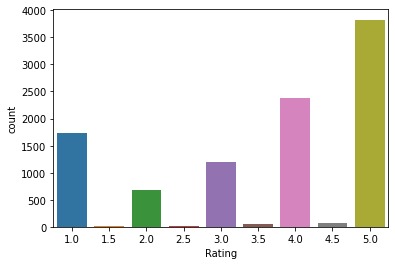

In [ ]:
# Chart - 1 - Restarent Rating count
sns.countplot(review_df.Rating)

##### 1. Why did you pick the specific chart?

To visualize the distribution of average restaurent ratings in hyderabad

##### 2. What is/are the insight(s) found from the chart?

- 3700 Restaurents are with 5 star rating.
- 1700 Restaurents are with 1 star rating




#### Chart - 2

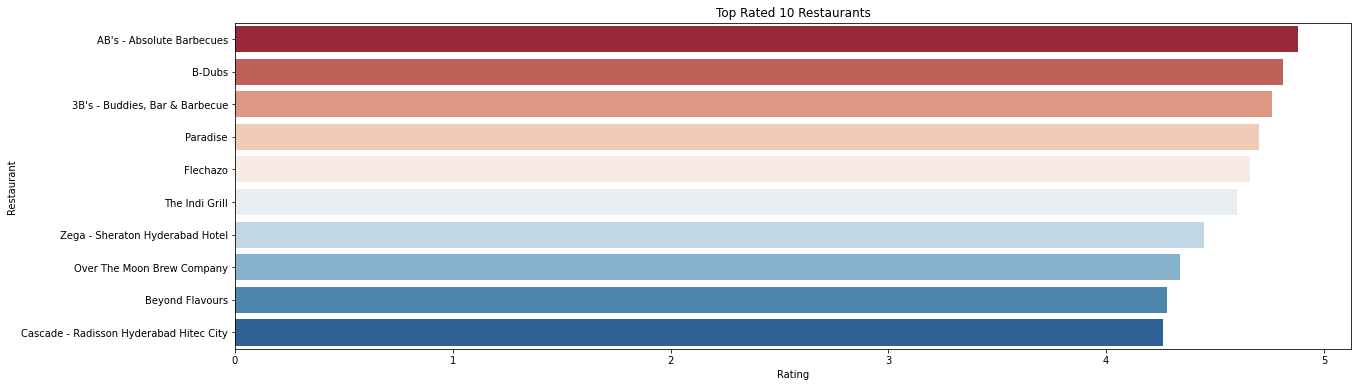

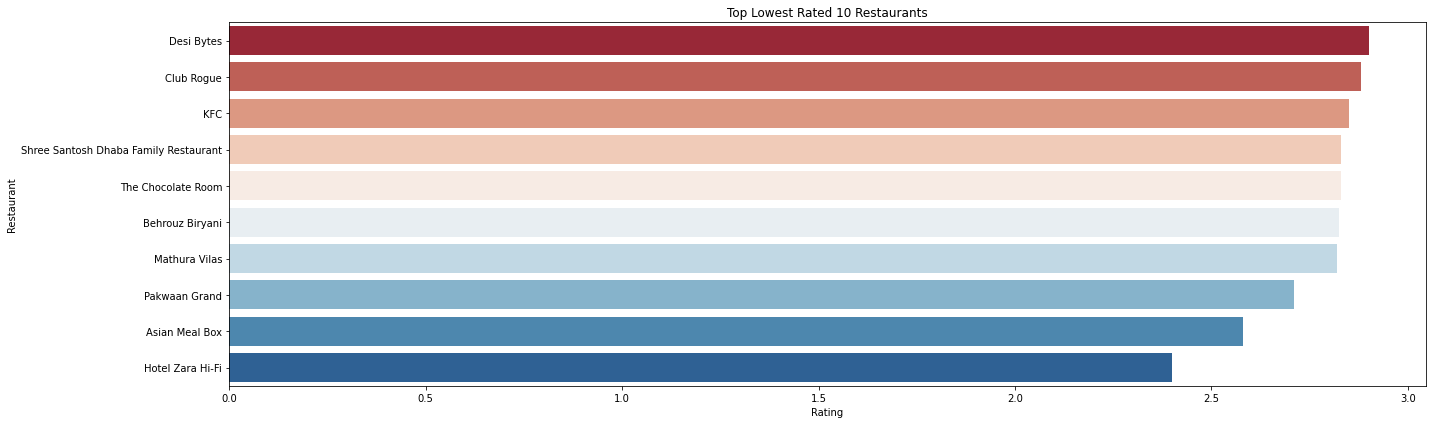

In [ ]:
# Chart - 2 visualization code

df_rating = review_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
plt.subplots(1,1,figsize = (20,6))
sns.barplot(data=df_rating.head(10), x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Rated 10 Restaurants')
plt.subplots(1,1,figsize = (20,6))
sns.barplot(data=df_rating.tail(10), x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Lowest Rated 10 Restaurants')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To visualize the Ratings of the Restaurents.

##### 2. What is/are the insight(s) found from the chart?

- AB's - Absolute Barbecues	has the highest rating of 4.8
- Hotel Zara HiFi has the lowest rating of 2.4

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 3

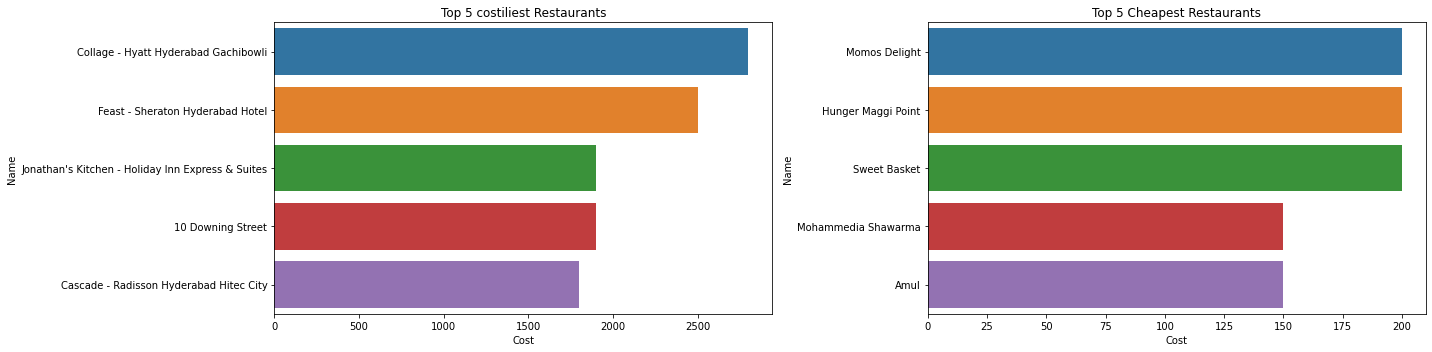

In [ ]:
# Chart - 3 visualization code
names_df.reset_index().drop(['index'],axis=1,inplace=True)
df_cost = names_df[['Name','Cost']].sort_values(['Cost'],ascending=False)
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.barplot(data = df_cost.head(5) , x = 'Cost',y = 'Name')
plt.title('Top 5 costiliest Restaurants')
plt.subplot(1,2,2)
sns.barplot(data = df_cost.tail(5) , x = 'Cost',y = 'Name')
plt.title('Top 5 Cheapest Restaurants')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To visualize the costliest and affordable restaurants.

##### 2. What is/are the insight(s) found from the chart?

- Collage - Hyatt Hyderabad Gachibowli is the costliest restaurent.
- Amul is the affordable restaurent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 4

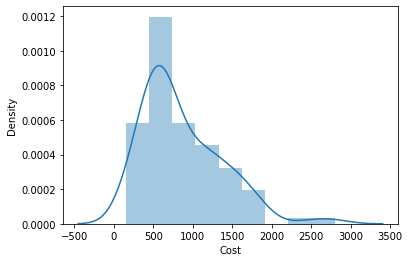

In [ ]:
# Chart - 4 visualization code
sns.distplot(names_df['Cost'])

##### 1. Why did you pick the specific chart?

To visualize the distribution of cost 

##### 2. What is/are the insight(s) found from the chart?

Average Cost of Restaurant is 500.

#### Chart - 5

Text(0.5, 1.0, 'Restaurants Ratings over the Years')

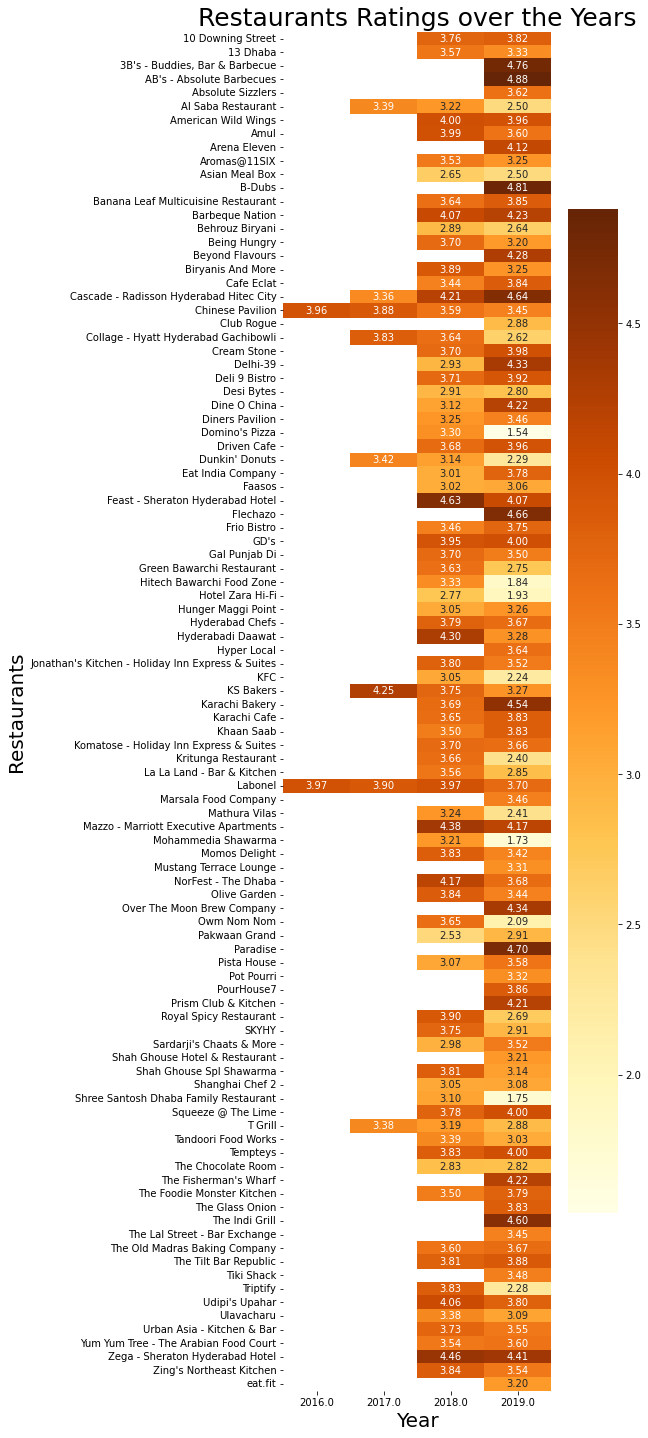

In [ ]:
# Chart - 5 visualization code
rest_time_rev=review_df.groupby(['Restaurant','Year']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Overall Score')
heatmap_df=pd.pivot(rest_time_rev,values='Average Overall Score',index='Restaurant',columns='Year')
plt.figure(figsize=(6,25))
sns.heatmap(heatmap_df,annot=True,fmt='.2f',cmap='YlOrBr')
plt.xlabel('Year',size=20)
plt.ylabel('Restaurants',size=20)
plt.title('Restaurants Ratings over the Years',size=25)

##### 1. Why did you pick the specific chart?

To visualize the performance of the restaurant over the years

##### 2. What is/are the insight(s) found from the chart?

- only 2 restaurants has review in 2016 and 7 restaurants in 2017
- restaurents listed in 2019 has high rating than previously listed restaurents

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.Answer Here

#### Chart - 6

A total of 7442 users have sumbitted a review- with each user submitting at an average of 1.3375436710561677 reviews
----------The Top 15 Users who have submitted the most reviews------------
                            Reviewer  Review Count
654                           Ankita            13
3855                     Parijat Ray            13
2652                           Kiran            12
7009                    Vedant Killa            11
2311                       Jay Mehta            11
3131           Manojkumar D Nambisan            10
6126                         Sravani            10
5954                      Siva Kumar            10
4256                        Priyanka            10
264   Age Of Foodies (Suraj Karambe)            10
4130                 Prasun Gokhlani             9
3998               Prachita Jayaswal             9
3694                           Nillu             9
2642                 Khushboo Pandey             9
7172                           Vinay       

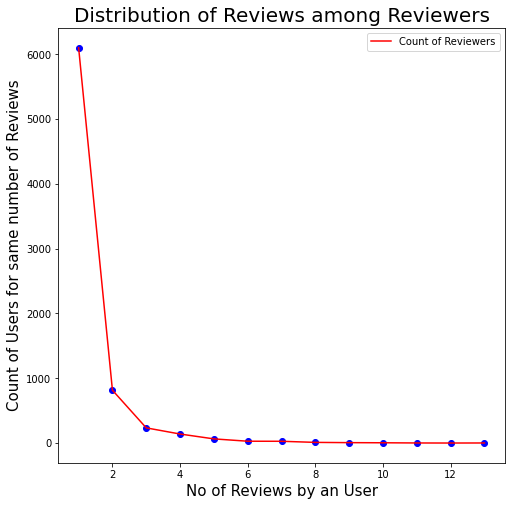

In [ ]:
top_reviewer=review_df.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
top_reviewer=top_reviewer.sort_values(by='Review Count',ascending=False)
print('A total of {} users have sumbitted a review- with each user submitting at an average of {} reviews'.format(review_df.Reviewer.nunique(),np.average(review_df.Reviewer.value_counts())))
print('----------The Top 15 Users who have submitted the most reviews------------')
print(top_reviewer[:15])
top_reviewer_count=top_reviewer.groupby('Review Count').apply(lambda x:x['Review Count'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,8))
plt.plot(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='r')
plt.scatter(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='b')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Count of Users for same number of Reviews',size=15)
plt.title('Distribution of Reviews among Reviewers',size=20)
plt.legend(['Count of Reviewers'])

##### 1. Why did you pick the specific chart?

To visualize the distribution of reviews among reviewers

##### 2. What is/are the insight(s) found from the chart?

A total of 7442 users have sumbitted a review.

Each user submitting at an average of 1.33 reviews.

Most of the users have submitted one or two reviews,decreases rapidly after 3 reviews by an user

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 7

A total of 7442 users have sumbitted a rating- with an average rating of-> 3.578301536992077 


Text(0.5, 1.0, 'Average Ratings per Review Submitted Distribution')

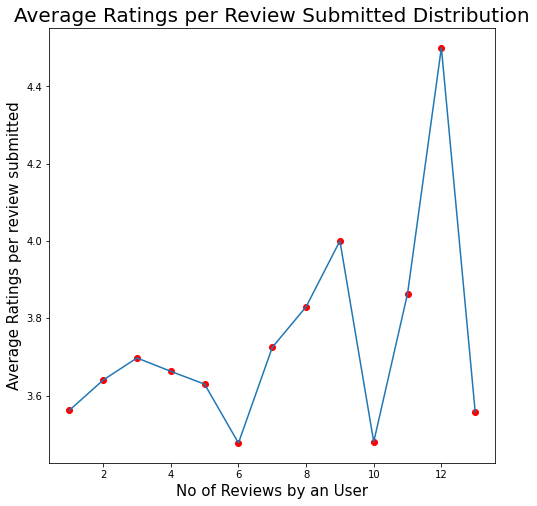

In [ ]:
# Chart - 7 visualization code
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
print('A total of {} users have sumbitted a rating- with an average rating of-> {} '.format(review_df.Reviewer.nunique(),np.average(review_ratings['Average Ratings'])))
review_ratings=pd.merge(top_reviewer,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers=review_ratings[:15]
review_ratings_plot=review_ratings.groupby('Review Count').apply(lambda x:np.average(x['Average Ratings'])).reset_index(name='Average')
plt.figure(figsize=(8,8))
plt.plot(review_ratings_plot['Review Count'],review_ratings_plot['Average'])
plt.scatter(review_ratings_plot['Review Count'],review_ratings_plot['Average'],color='r')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Average Ratings per review submitted',size=15)
plt.title('Average Ratings per Review Submitted Distribution',size=20)

##### 1. Why did you pick the specific chart?

To visualize the distribution of average rating per review

##### 2. What is/are the insight(s) found from the chart?

no of reviews by an user upto < 5 are consistent, beyond that it is more volatile

it may be because of more number of reviewers submitted 1 0r 2 reviews,because of that upto <5 reviews are consistent, beyond that no of users reviewed the restaurent is less,so average rating is not consistent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 8

Text(0.5, 1.0, 'Ratings of the Restaurants by the Top Reviewers')

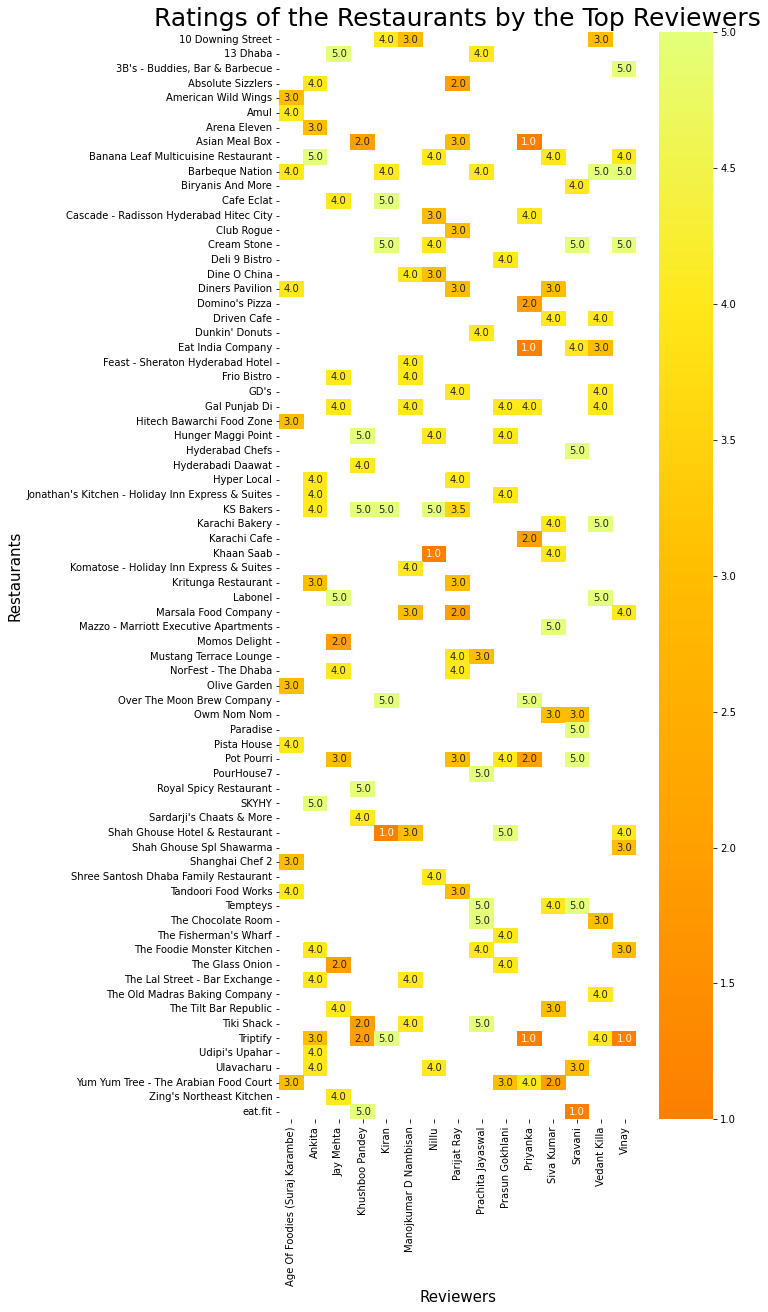

In [ ]:
# Chart - 8 visualization code
top_reviews=pd.merge(top_reviewers,review_df,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviews_avg=top_reviews.groupby(['Reviewer','Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
rating_pivot=pd.pivot(top_reviews_avg,values='Average Ratings',index='Restaurant',columns='Reviewer')
rating_pivot.replace(np.NaN,0)
plt.figure(figsize=(8,20))
sns.heatmap(rating_pivot,annot=True,fmt='.1f',cmap='Wistia_r')
plt.xlabel('Reviewers',size=15)
plt.ylabel('Restaurants',size=15)
plt.title('Ratings of the Restaurants by the Top Reviewers',size=25)

##### 1. Why did you pick the specific chart?

To visualize the rating of the restaurant by the top reviewers

##### 2. What is/are the insight(s) found from the chart?

if a restaurant gets good rating(>4) from multiple reviewers, it can be classified as star performer

if a restaurant gets poor rating(>3) from multiple reviewers, the restaurant need to improve.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The gained insights will help to creat a positive business impact.

There are not any insights that lead to negative growth.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

flat_cuisine_1= np.concatenate(names_df.Cuisines)
freq_cuisine = Counter(flat_cuisine_1)
freq_cuisine_1 = pd.DataFrame(freq_cuisine.values(),index = freq_cuisine.keys(),columns = (['Count'])).reset_index().rename(columns={'index': 'Restaurent'}).sort_values(by = 'Count',ascending = False)


In [ ]:
freq_cuisine_1.head(5)

,Restaurent,Count
3,North Indian,64
2,Chinese,45
4,Continental,39
6,Hyderabadi,18
16,Fast Food,17


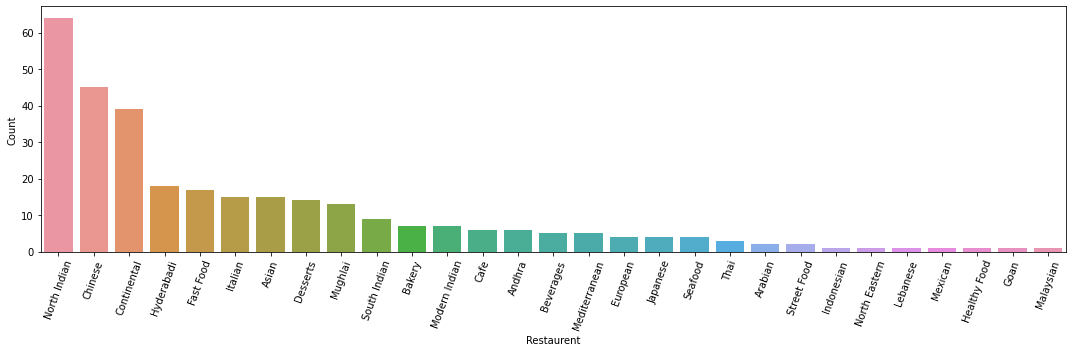

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = freq_cuisine_1,x = freq_cuisine_1.Restaurent, y = freq_cuisine_1.Count)
plt.xticks(rotation=70)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To visualize the popularity of cuisines in hyderabad.

##### 2. What is/are the insight(s) found from the chart?

most of the restaurent offer northindian dishes, followed by chinese.from this plot, we can infer that most of the restaurant offer north indian and chinese dishes.

#### Chart - 10

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

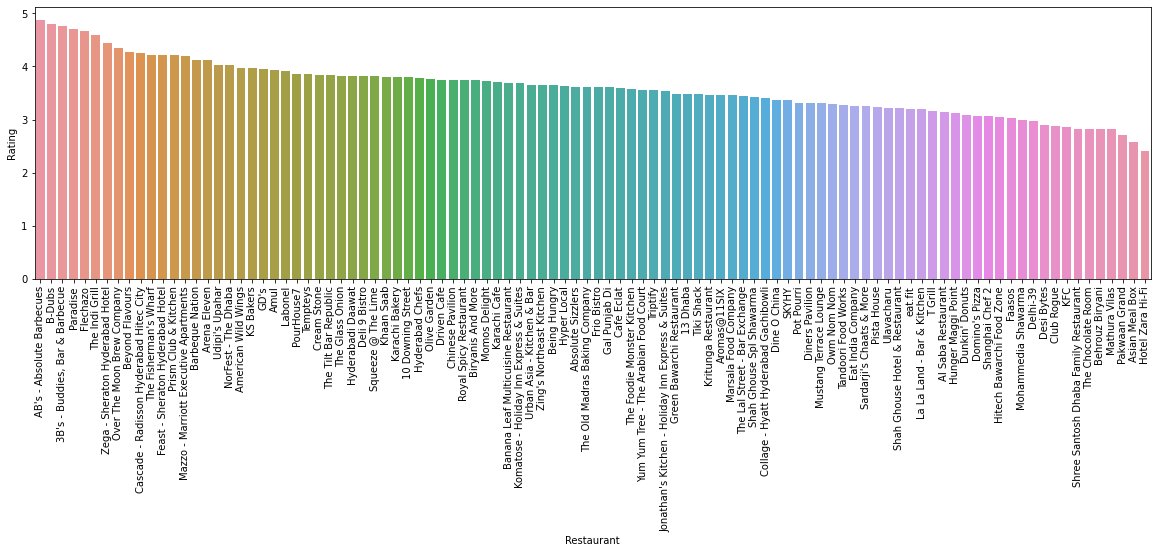

In [ ]:
# Chart - 10 visualization code
avg_rating = review_df.groupby(['Restaurant'])['Rating'].mean().reset_index().sort_values(by=['Rating'],ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data= avg_rating ,x = avg_rating.Restaurant , y = avg_rating.Rating)
plt.xticks(rotation=90)

##### 1. Why did you pick the specific chart?

To visualize the average rating of the restaurants

##### 2. What is/are the insight(s) found from the chart?

The average rating of the restaurents in zomato is around 3. The restaurents can be classified as below
 -  Greaterthan 3 - Star performers;  
 -  lessthan    3    - Poor performers

## ***6. Hypothesis Testing***

### Clustering is done on the basis of similarities between the data points. The similarities are understood by how closely distanced these points are. The following are some hypotheses that can be generated by finding some similarities in the visualized data:



- Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.

- Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.

- Restaurants having some of the most popular cuisines can be clustered together and restaurants with exotic cuisines such as Indonesian, Mexican, Japanese, etc can be clustered as they are really low in number.

## ***7. Feature Engineering***

### 1. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
names_df.head(5)

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Mughlai, South Indian, Chinese, North Indian,...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[North Indian, Hyderabadi, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Mediterranean, North Indian, Asian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Seafood, Chinese, North Indian, Beverages, Hy...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Mediterranean, Chinese, North Indian, Asian, ...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# visualize the df
cuisines_df.head(5)

,Name,Links,Cost,Cuisines,Timings,Andhra,Arabian,Asian,Bakery,Beverages,...,Mediterranean,Mexican,Modern Indian,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food,Thai
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"[Mughlai, South Indian, Chinese, North Indian,...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"[North Indian, Hyderabadi, Chinese]",11 AM to 11 PM,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"[Mediterranean, North Indian, Asian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"[Seafood, Chinese, North Indian, Beverages, Hy...",12 Noon to 2 AM,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"[Mediterranean, Chinese, North Indian, Asian, ...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# visualize the df
review_df.head(5)

,Restaurant,Reviewer,Review,Rating,Pictures,Year,Month,Date,Hour,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019.0,5.0,25.0,15.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019.0,5.0,25.0,14.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019.0,5.0,24.0,22.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019.0,5.0,24.0,22.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019.0,5.0,24.0,21.0,3.0,2.0


In [ ]:
# create a new feature ' Total Cuisines' - count the no of cuisines available in each restaurent
cuisines_df['Total Cuisines'] = cuisines_df['Cuisines'].apply(lambda x: len(x))

In [ ]:
# Rename the column ' Name' to 'Restaurent' to merge the two df
cuisines_df.rename(columns = {'Name':'Restaurant'}, inplace = True)

In [ ]:
# Group all the Restaurent and calculate the average rating of the restaurents 
cluster_rating = review_df.groupby(['Restaurant'])['Rating'].mean().reset_index()

In [ ]:
# visualize the df
cluster_rating.head(5)

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62


In [ ]:
# merge the two df - cluster df and cluster rating df
cluster_df = pd.merge(cluster_rating,cuisines_df,how='left',on=['Restaurant'])
cluster_df.head(5)

,Restaurant,Rating,Links,Cost,Cuisines,Timings,Andhra,Arabian,Asian,Bakery,...,Mexican,Modern Indian,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food,Thai,Total Cuisines
0,10 Downing Street,3.80,https://www.zomato.com/hyderabad/10-downing-st...,1900,"[Continental, North Indian, Chinese]",12 Noon to 12 Midnight,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1,13 Dhaba,3.48,https://www.zomato.com/hyderabad/13-dhaba-gach...,450,[North Indian],"12:30 PM to 10 PM (Tue-Sun), Mon Closed",0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,"3B's - Buddies, Bar & Barbecue",4.76,https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"[North Indian, Mediterranean, European]","12 Noon to 4 PM, 6:30 PM to 11:30 PM",0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,AB's - Absolute Barbecues,4.88,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"[North Indian, Mediterranean, European]","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
4,Absolute Sizzlers,3.62,https://www.zomato.com/hyderabad/absolute-sizz...,750,"[Continental, Chinese]",11:30 AM to 1 AM,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
cluster_df1 = cluster_df[['Cost','Rating','Total Cuisines']]

### 2. Data Transformation

### 3. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
#fitting numerical columns

numerical_cols = ['Cost','Total Cuisines','Rating']
scaler = MinMaxScaler()
scaler.fit(cluster_df[numerical_cols])
scaled_df = cluster_df.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_df[numerical_cols])

In [ ]:
#setting Restaurant name as index for both datasets
#restaurant dataset
cluster_df.set_index(['Restaurant'],inplace=True)
#Scaled restaurant dataset
scaled_df.set_index(['Restaurant'],inplace=True)

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, I think it is needed because It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.

In [ ]:
scaled_df.drop(['Links','Cuisines','Timings'], axis =1,inplace = True)

In [ ]:
# DImensionality Reduction
# principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19351106 0.16352893 0.08397333]
Cumulative variance explained by 3 principal components: 44.10%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA(Principal Component Analysis) technique for dimensionality reduction because It reduces the time and storage space required.

## ***8. ML Model Implementation***

### ML Model - 1

#### Kmeans Clustering (cost and Rating)

In [ ]:
#importing kmeans
from sklearn.cluster import KMeans


#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

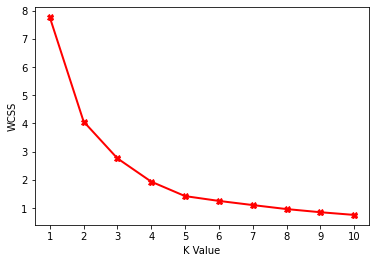

In [ ]:

#The elbow curve

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="X")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

It is evident that the WCSS barely decreases after 5 cluster.five clusters would be the ideal number. 

#### VISUALIZATION OF 2D KMeans CLUSTERING

In [ ]:
#copy the dataset for Visualize the Kmens Clustering
kmeans_df=scaled_df.copy()

In [ ]:
#fit predict kmeans on 5 clusters
model = KMeans(n_clusters=5,random_state= 42)
predict = model.fit_predict(kmeans_df[['Cost', 'Rating']])
kmeans_df["label"] = predict

Text(0.5, 1.0, 'Cost vs Average Rating')

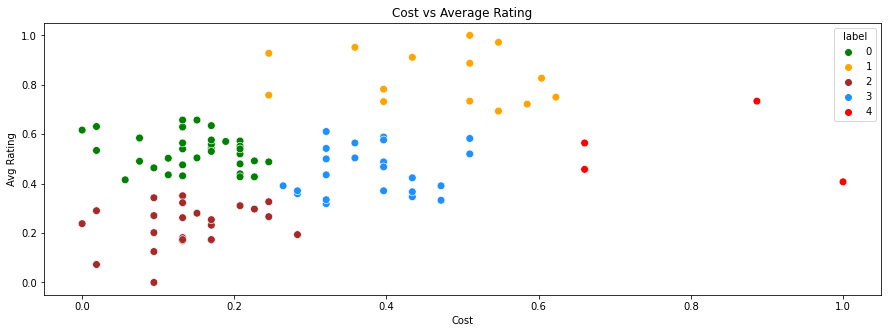

In [ ]:
#Scatterplot of the selcted K clusters
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'Cost',y = 'Rating',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

Level 0 - Low cost, Average Rating

level 1 - Average cost,High Rating

level 2 - Low cost ,Low Rating

level 3 - Average cost,Average Rating 

level 4 - high cost,Average Rating

#### Silhouette Score Method on Cost and Ratings

In [ ]:
#importing silhouette score libray
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

X=(scaled_df[['Cost','Rating']])
#fitting the Kmeans 
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
# finding the silhouette score
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4698820494424271
For n_clusters = 3, silhouette score is 0.3944443788296608
For n_clusters = 4, silhouette score is 0.44196695545463954
For n_clusters = 5, silhouette score is 0.46106190696943367
For n_clusters = 6, silhouette score is 0.4455426395333968
For n_clusters = 7, silhouette score is 0.38482113091715836
For n_clusters = 8, silhouette score is 0.34896258235203703
For n_clusters = 9, silhouette score is 0.32800665027591036
For n_clusters = 10, silhouette score is 0.33870153074926884
For n_clusters = 11, silhouette score is 0.3660977837878894
For n_clusters = 12, silhouette score is 0.36736305844708267
For n_clusters = 13, silhouette score is 0.373914214841856
For n_clusters = 14, silhouette score is 0.36862752712684455
For n_clusters = 15, silhouette score is 0.3798954120072255


The Silhoutte score is maximum at 5 no of clusters.

#### Hierarchical Clustering on Cost and Rating

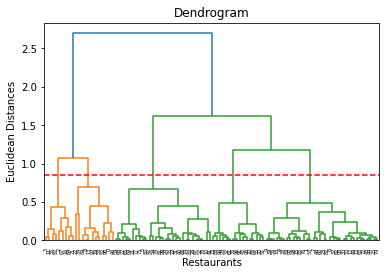

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=0.85, color='r', linestyle='--')

hierarchical clustering visually showing the best number of cluster and conclude from the above analysis that 5 cluster is sufficient.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#importing silhouette score libray
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

X=(pca_result)
#fitting the Kmeans 
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
# finding the silhouette score
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.34528209573380914
For n_clusters = 3, silhouette score is 0.41631443993128975
For n_clusters = 4, silhouette score is 0.44307432323184565
For n_clusters = 5, silhouette score is 0.49352837733328864
For n_clusters = 6, silhouette score is 0.5193709673924854
For n_clusters = 7, silhouette score is 0.535324794806283
For n_clusters = 8, silhouette score is 0.5383348577389754
For n_clusters = 9, silhouette score is 0.5308997421907735
For n_clusters = 10, silhouette score is 0.5179756240172108
For n_clusters = 11, silhouette score is 0.5251609762584526
For n_clusters = 12, silhouette score is 0.5286606793940064
For n_clusters = 13, silhouette score is 0.5041417884939223
For n_clusters = 14, silhouette score is 0.4957136876603077
For n_clusters = 15, silhouette score is 0.48407716784310223


For Multidimensional Restaurant dataset gives 7 cluster at maximum silhouette score 0.5353.

In [ ]:
kmeans_pca = KMeans(n_clusters=7,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=7, random_state=11)

In [ ]:
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=cluster_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

In [ ]:
clustered_df = pd.merge(cluster_df,kmeans_pca_df,left_index=True, right_index=True)

In [ ]:
clustered_df.head(5)

,Rating,Links,Cost,Cuisines,Timings,Andhra,Arabian,Asian,Bakery,Beverages,...,North Indian,Seafood,South Indian,Street Food,Thai,Total Cuisines,PC1,PC2,PC3,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,3.80,https://www.zomato.com/hyderabad/10-downing-st...,1900,"[Continental, North Indian, Chinese]",12 Noon to 12 Midnight,0,0,0,0,0,...,1,0,0,0,0,3,-0.539621,0.450122,0.249136,5
13 Dhaba,3.48,https://www.zomato.com/hyderabad/13-dhaba-gach...,450,[North Indian],"12:30 PM to 10 PM (Tue-Sun), Mon Closed",0,0,0,0,0,...,1,0,0,0,0,1,0.076609,-0.319681,-0.403822,3
"3B's - Buddies, Bar & Barbecue",4.76,https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"[North Indian, Mediterranean, European]","12 Noon to 4 PM, 6:30 PM to 11:30 PM",0,0,0,0,0,...,1,0,0,0,0,3,-0.008870,-0.053918,-0.610265,3
AB's - Absolute Barbecues,4.88,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"[North Indian, Mediterranean, European]","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",0,0,0,0,0,...,1,0,0,0,0,3,-0.015434,-0.017757,-0.606663,3
Absolute Sizzlers,3.62,https://www.zomato.com/hyderabad/absolute-sizz...,750,"[Continental, Chinese]",11:30 AM to 1 AM,0,0,0,0,0,...,0,0,0,0,0,2,0.096955,0.203619,0.800851,6


In [ ]:
#function for Cluster Cuisines
def cluster_cuisines(df):
  #setting figure size, and susplot position
  fig, axes = plt.subplots(4, 2, figsize=(20, 18))
  for i in range(0,8,1):
    #creae Empty Dataframe
    cluster_cuisines = pd.DataFrame()
    #cuisines list
    cuisines=list(cuisine_dict.keys())
    #row and column axes position for each subplot
    row_axes=[0,0,1,1,2,2,3,3]
    column_axes=[0,1,0,1,0,1,0,1]

    #create the column for cuisines and summing the restaurant w.r.to cuisines
    cluster_cuisines['Cuisines'] = cuisines
    df1=(df[df['label']==(i)])
    cluster_cuisines['Total Restaurants'] = [df1[i].sum() for i in cuisines]

    #create subplot
    plt.suptitle('Cluster Wise Cuisines', color="green", fontweight='bold',size=15)
    sns.barplot(x='Total Restaurants', y='Cuisines',data=cluster_cuisines,ax=axes[row_axes[i],column_axes[i]])
    axes[row_axes[i],column_axes[i]].set_title(f'The Most Popular Cuisines in Cluster {i}',size=10, color="red",fontweight='bold')
    
    #empty the dataframe for next iteration of for loop
    cluster_cuisines.empty

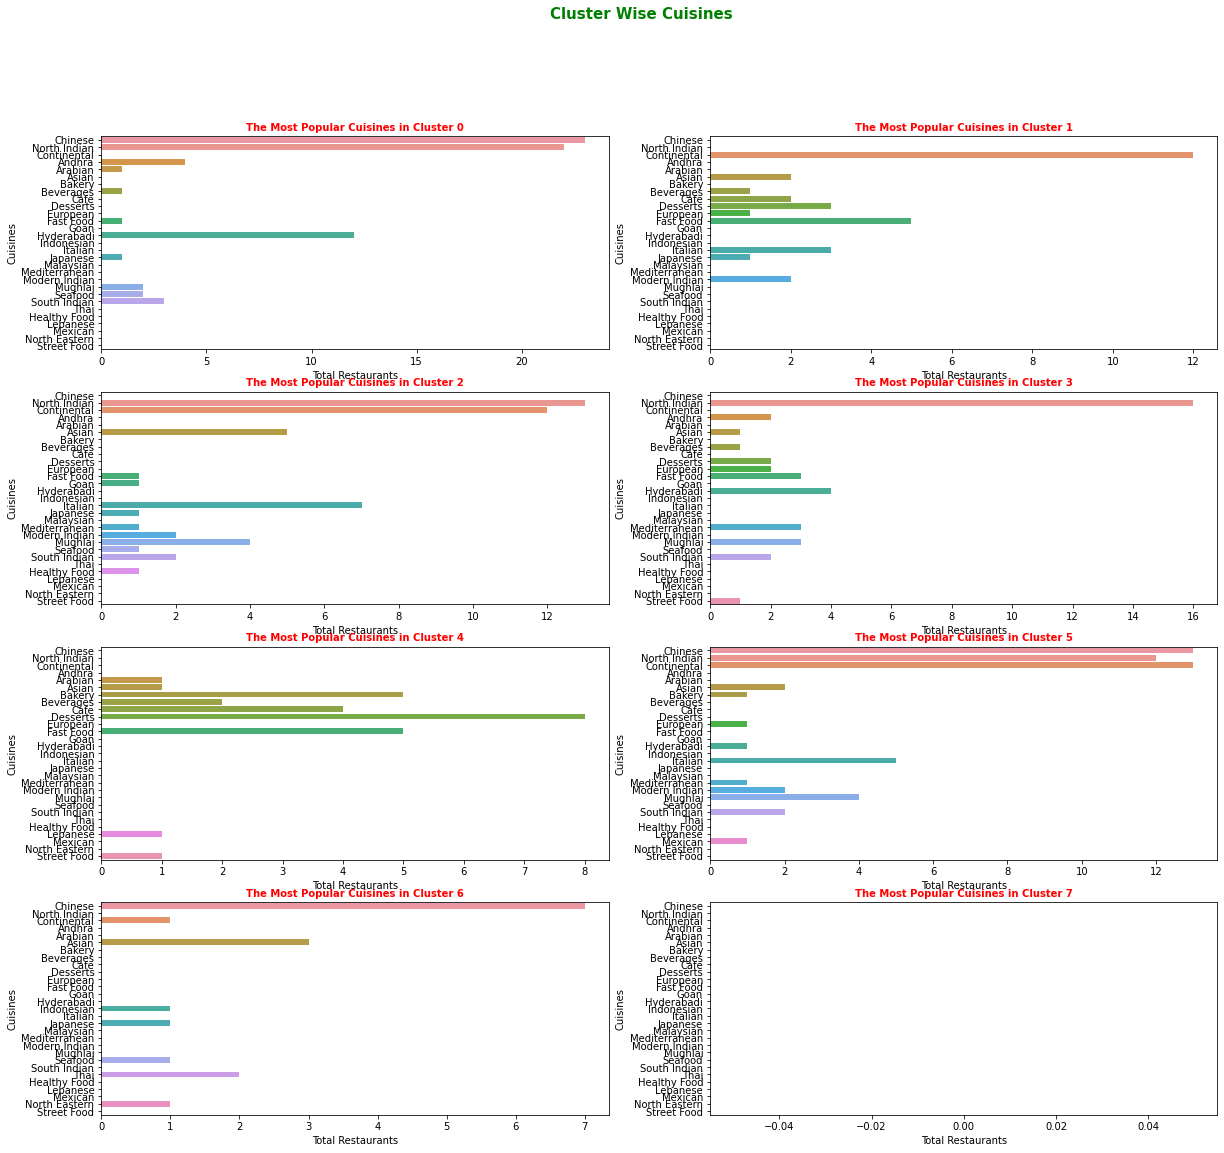

In [ ]:
cluster_cuisines(clustered_df)

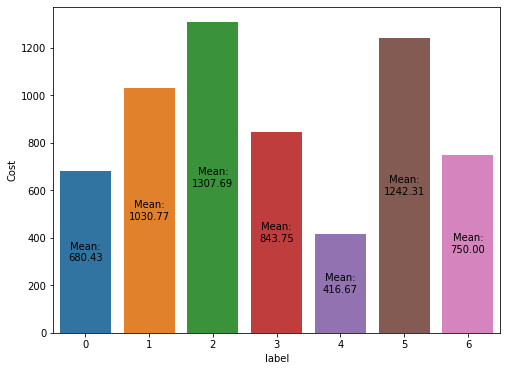

In [ ]:
# visualize the average cost per person in each cluter
fig, ax = plt.subplots(figsize=(8, 6))
avg_cost_df = clustered_df.groupby(['label'])['Cost'].mean().reset_index()
sns.barplot(data = avg_cost_df,x = 'label',y = 'Cost')
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(s=text, xy=xy, ha='center', va='center')

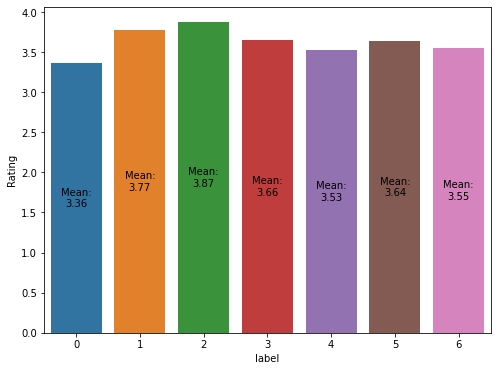

In [ ]:
# To visualize the avaerage rating in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
avg_rating_df = clustered_df.groupby(['label'])['Rating'].mean().reset_index()
sns.barplot(data = avg_rating_df,x = 'label',y = 'Rating')
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(s=text, xy=xy, ha='center', va='center')

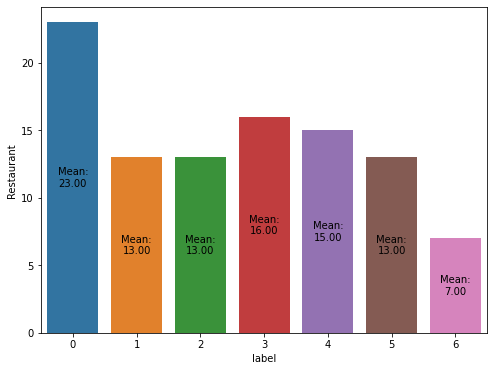

In [ ]:
# To visualize no of restaurents in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
rest_count_df = clustered_df.reset_index().groupby(['label'])['Restaurant'].count().reset_index()
sns.barplot(data = rest_count_df,x = 'label',y = 'Restaurant')
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(s=text, xy=xy, ha='center', va='center')

Cluster 0 - No of resstaurents = 23 , Average rating = 3.36 ,Average cost =680, Popular Cuisines = chinese, North Indian

Cluster 1 - No of resstaurents = 13 ,Average rating = 3.77 , Average cost =1030 , Popular Cuisines = Continental, Fast Food

Cluster 2 - No of resstaurents =13, Average rating = 3.87 , Average cost =1307, Popular Cuisines = North Indian , Continental

Cluster 3 - No of resstaurents =16, Average rating = 3.66 , Average cost = 843, Popular Cuisines = North Indian, Hyderabad

Cluster 4 - No of resstaurents = 15, Average rating = 3.53 , Average cost =416, Popular Cuisines = Desserts,cafe,fast food

Cluster 5 - No of resstaurents = 13, Average rating = 3.64 , Average cost = 1242, Popular Cuisines = Continental, chinese, North Indian

Cluster 6 - No of resstaurents = 07, Average rating = 3.55 , Average cost =750, Popular Cuisines = chinese , Asian

### ML Model - 3

#### Hierarchical Clustering 

In [ ]:
scaled_df.head(2)

,Rating,Cost,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Chinese,Continental,...,Mexican,Modern Indian,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food,Thai,Total Cuisines
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,0.564516,0.660377,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0.4
13 Dhaba,0.435484,0.113208,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0


In [ ]:
# create a copy of df
scaled_hr_df = scaled_df.copy()

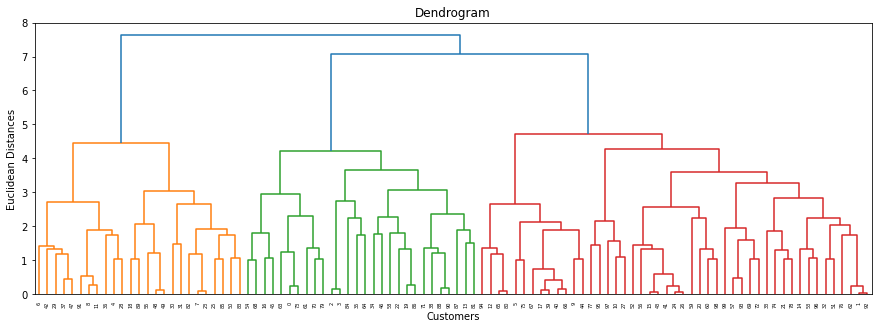

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(scaled_hr_df, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [ ]:

# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(scaled_df)

In [ ]:
clustered_df['label_hr']=y_hc

In [ ]:
clustered_df.head(5)

,Rating,Links,Cost,Cuisines,Timings,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Street Food,Thai,Total Cuisines,PC1,PC2,PC3,label,label_hr
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,3.80,https://www.zomato.com/hyderabad/10-downing-st...,1900,"[Continental, North Indian, Chinese]",12 Noon to 12 Midnight,0,0,0,0,0,...,0,0,0,0,3,-0.539621,0.450122,0.249136,5,2
13 Dhaba,3.48,https://www.zomato.com/hyderabad/13-dhaba-gach...,450,[North Indian],"12:30 PM to 10 PM (Tue-Sun), Mon Closed",0,0,0,0,0,...,0,0,0,0,1,0.076609,-0.319681,-0.403822,3,0
"3B's - Buddies, Bar & Barbecue",4.76,https://www.zomato.com/hyderabad/3bs-buddies-b...,1100,"[North Indian, Mediterranean, European]","12 Noon to 4 PM, 6:30 PM to 11:30 PM",0,0,0,0,0,...,0,0,0,0,3,-0.008870,-0.053918,-0.610265,3,2
AB's - Absolute Barbecues,4.88,https://www.zomato.com/hyderabad/abs-absolute-...,1500,"[North Indian, Mediterranean, European]","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",0,0,0,0,0,...,0,0,0,0,3,-0.015434,-0.017757,-0.606663,3,2
Absolute Sizzlers,3.62,https://www.zomato.com/hyderabad/absolute-sizz...,750,"[Continental, Chinese]",11:30 AM to 1 AM,0,0,0,0,0,...,0,0,0,0,2,0.096955,0.203619,0.800851,6,4


In [ ]:
#function for Cluster Cuisines
def cluster_cuisines_hr(df):
  #setting figure size, and susplot position
  fig, axes = plt.subplots(3, 2, figsize=(20, 18))
  for i in range(0,5,1):
    #creae Empty Dataframe
    cluster_cuisines = pd.DataFrame()
    #cuisines list
    cuisines=list(cuisine_dict.keys())
    #row and column axes position for each subplot
    row_axes=[0,0,1,1,2,2,3,3]
    column_axes=[0,1,0,1,0,1,0,1]

    #create the column for cuisines and summing the restaurant w.r.to cuisines
    cluster_cuisines['Cuisines'] = cuisines
    df1=(df[df['label_hr']==(i)])
    cluster_cuisines['Total Restaurants'] = [df1[i].sum() for i in cuisines]

    #create subplot
    plt.suptitle('Cluster Wise Cuisines', color="green", fontweight='bold',size=15)
    sns.barplot(x='Total Restaurants', y='Cuisines',data=cluster_cuisines,ax=axes[row_axes[i],column_axes[i]])
    axes[row_axes[i],column_axes[i]].set_title(f'The Most Popular Cuisines in Cluster {i}',size=10, color="red",fontweight='bold')
    
    #empty the dataframe for next iteration of for loop
    cluster_cuisines.empty

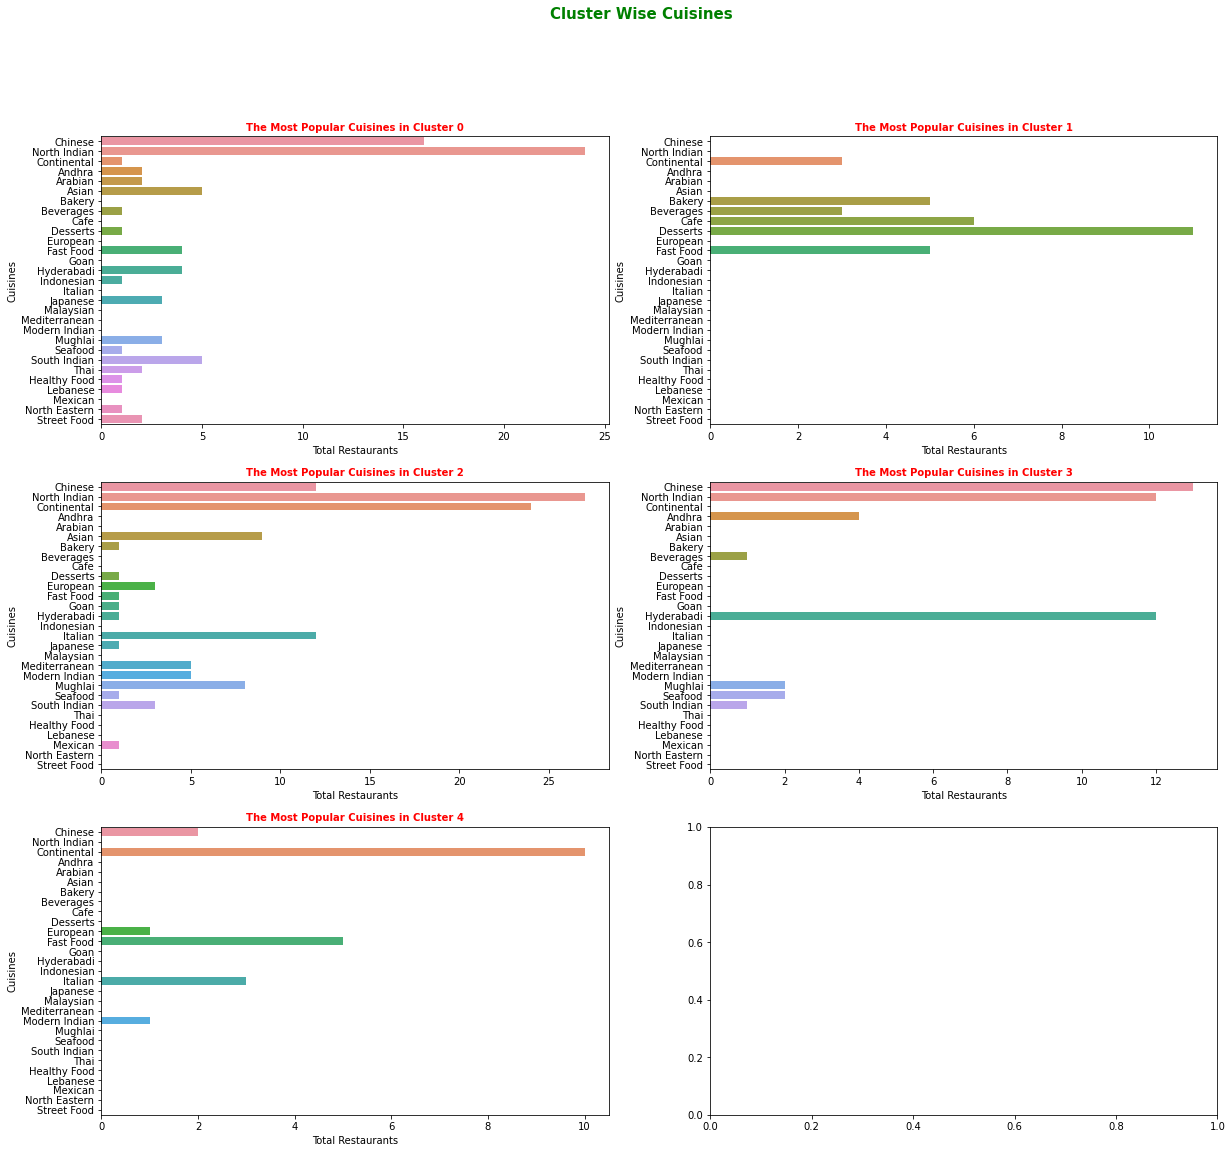

In [ ]:
cluster_cuisines_hr(clustered_df)

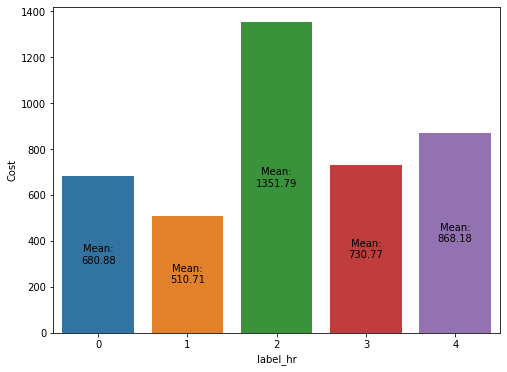

In [ ]:
# To visualize the average cost in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
avg_cost_df_hr = clustered_df.groupby(['label_hr'])['Cost'].mean().reset_index()
sns.barplot(data = avg_cost_df_hr,x = 'label_hr',y = 'Cost')

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(s=text, xy=xy, ha='center', va='center')

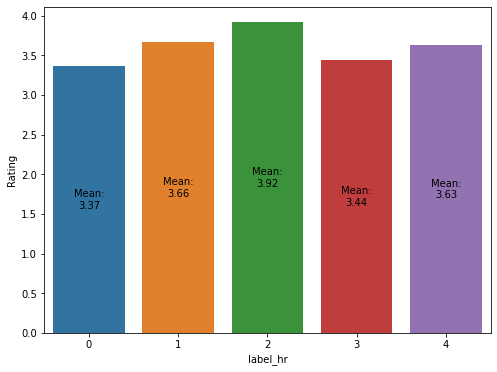

In [ ]:
# To visualize the average rating in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
avg_rating_df_hr = clustered_df.groupby(['label_hr'])['Rating'].mean().reset_index()
sns.barplot(data = avg_rating_df_hr,x = 'label_hr',y = 'Rating')
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(s=text, xy=xy, ha='center', va='center')

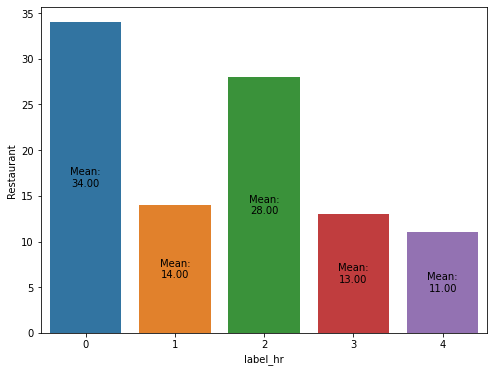

In [ ]:
# To visualize the no of restaurents in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
rest_count_df_hr = clustered_df.reset_index().groupby(['label_hr'])['Restaurant'].count().reset_index()
sns.barplot(data = rest_count_df_hr,x = 'label_hr',y = 'Restaurant')
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(s=text, xy=xy, ha='center', va='center')

Cluster 0 - No of resstaurents = 34 , Average rating = 3.37 ,Average cost =680, Popular Cuisines = chinese, North Indian


Cluster 1 - No of resstaurents = 14 ,Average rating = 3.66 , Average cost =510, Popular Cuisines = Desserts, cafe


Cluster 2 - No of resstaurents =28, Average rating = 3.92 , Average cost =1351, Popular Cuisines = North Indian , Continental


Cluster 3 - No of resstaurents =13, Average rating = 3.44 , Average cost = 730, Popular Cuisines = Chinese, North Indian, Hyderabad


Cluster 4 - No of resstaurents = 11, Average rating = 3.63 , Average cost =868, Popular Cuisines = Continental, Fast Food


## **9.Sentiment Analysis**

In [ ]:
senti_df.head(5)

,Review,Rating
0,ambience good food quite good saturday lunch c...,5.0
1,ambience good pleasant evening service prompt ...,5.0
2,must try great food great ambience thnx servic...,5.0
3,soumen da arun great guy behavior sincerety go...,5.0
4,food goodwe ordered kodi drumstick basket mutt...,5.0


In [ ]:
#Make binary Rating as Positive and Negative Rating only for model analysis
senti_df['sentiment'] = senti_df['Rating'].apply(lambda rating : 1 if rating > 3 else 0)

In [ ]:
senti_df.head(5)

,Review,Rating,sentiment
0,ambience good food quite good saturday lunch c...,5.0,1
1,ambience good pleasant evening service prompt ...,5.0,1
2,must try great food great ambience thnx servic...,5.0,1
3,soumen da arun great guy behavior sincerety go...,5.0,1
4,food goodwe ordered kodi drumstick basket mutt...,5.0,1


In [ ]:
#selecting X and Y variable
from sklearn.model_selection import train_test_split
X=senti_df['Review']
Y=senti_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.2)

In [ ]:
#import tfidf library
from sklearn.feature_extraction.text import TfidfVectorizer
#creating tfidf vectorizer function
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Import required classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import naive_bayes


# hyperparameter tuning using randomized search cv
from sklearn.model_selection import RandomizedSearchCV

# Classification model metrics
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Building the classification model
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
nb = naive_bayes.MultinomialNB()


In [ ]:
# To fit the x_train and y_train in all the regression models
grids = [ dt, rf, xgb,nb]
for pipe in grids:
    pipe.fit(X_train_vec,y_train)

In [ ]:
# grid_dict is created to iterate over the loop for evaluation metrics 
grid_dict = {0: 'Decision Trees', 1: 'Random Forest', 
             2: 'XGBoost',3:'Naive Bayes'}

In [ ]:
# Metric Table is created to compare the r2 score and RMSE score for different regression models


def classification_metrics(x_train,x_test,y_train,y_test):
  metrics_table = pd.DataFrame(columns=['Classification_Model', 'Train_auc_roc_score', 'Test_auc_roc_score', 'Train_precision',
                                      'Test_precision','Train_Recall','Test_Recall','Train_f1-score','Test_f1-score','Train_accuracy','Test_accuracy'])
  for i,model in enumerate(grids):
    y_train_pred =model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_train_prob =model.predict(x_train)
    y_test_prob = model.predict(x_test)

    metrics_table.loc[len(metrics_table.index)]=(grid_dict[i],
                                                roc_auc_score(y_train, y_train_pred),
                                                roc_auc_score(y_test, y_test_pred),
                                                precision_score(y_train, y_train_pred),
                                                precision_score(y_test, y_test_pred),
                                                recall_score(y_train, y_train_pred),
                                                recall_score(y_test, y_test_pred),
                                                f1_score(y_train,y_train_pred),
                                                f1_score(y_test,y_test_pred),
                                                accuracy_score(y_train,y_train_pred),
                                                accuracy_score(y_test,y_test_pred))
  return metrics_table

In [ ]:
classification_metrics(X_train_vec,X_test_vec,y_train,y_test)

,Classification_Model,Train_auc_roc_score,Test_auc_roc_score,Train_precision,Test_precision,Train_Recall,Test_Recall,Train_f1-score,Test_f1-score,Train_accuracy,Test_accuracy
0,Decision Trees,0.991031,0.762332,0.991534,0.823944,0.996833,0.833729,0.994176,0.828808,0.992591,0.781517
1,Random Forest,0.990812,0.826159,0.990954,0.851079,0.997427,0.936659,0.994180,0.891821,0.992591,0.855851
2,XGBoost,0.801037,0.766535,0.822802,0.799463,0.961401,0.943785,0.886718,0.865650,0.844154,0.814164
3,Naive Bayes,0.820978,0.764351,0.831835,0.789574,0.988915,0.983373,0.903599,0.875882,0.866131,0.823204


 in sentimental analysis, need to consider the scores of accuracy along with recall and f1 score. We don't focus on precision, as our main aim is to check for how accurate is our predictions and how correctly our model is able predict the true positives(recall).

 We can observe that Naive bayes is working good. Its accuracy and recall is more when compared to other models. So we conclude that that Naive bayes is the best model in this sentimental analysis.

## ***10.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


ValueError: ignored

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

***some of the important Conclusion drawn from zomato restaurent analysis are***

---



Top Rated Restaurents - Absolute Barbecues, B-Dubs, and 3B's - Buddies, Bar & Barbecue

Cost - 150 INR to 2800 INR

Popular Cuisines- North Indian, Chinese, Continental, and Hyderabadi


---


***Clustering***

Restaurant Clustering was done in two approaches. First with just two features and then with all of them. Kmeans Clustering worked well in the first approach but as we increase the dimensions, it isn't able to distinguish the clusters hence principal component analysis was done and then clustered into 7 clusters. The similarities in the data points within the clusters were pretty great.

- Cluster 0 - The restaurants in cluster 0 have mostly chinese and North Indian foods available with them. The No of restaurents in cluster 0 are 23 and  average rating is 3.36 and the average cost is 680 INR . This means the restaurants are basically economical.

- Cluster 1 - The restaurants in cluster 1 have mostly continental and fast food.The No of restaurents in cluster 1 are 13 and The average rating is 3.77 and the average cost is 1030 INR. These restaurants are slightly higher in prices than cluster 0.

- Cluster 2 - The restaurants in cluster 2 have all the popular cuisines available with them including North Indian and continental.The No of restaurents in cluster 2 are 13 andThe average rating is 3.87 which is better than the other two clusters and the average cost is 1307 INR. These restaurants are fine dining restaurants.

- Cluster 3 - The restaurants in cluster 3 have mostly north indian and other prominent cuisines.The No of restaurents in cluster 3 are 16 and The average rating is 3.66 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 843 INR.

- Cluster 4 - The restaurants in cluster 4 are basically small food joints, bakeries, and cafes.The No of restaurents in cluster 0 are 15 and The average rating is 3.53 and the average cost is 416 INR. 

- Cluster 5 - The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese, and continental. The No of restaurents in cluster 5 are 13 andThe average rating is 3.64 the average cost is 1242 INR. These restaurants are fine dining restaurants with popular cuisines like North Indian, Chinese, and continental.

- cluster 6 -  The restaurants in cluster 3 have mostly chinese and Asian cuisines.The No of restaurents in cluster 6 are 7 and The average rating is 3.55 the average cost is 750 INR. These restaurants are economical restaurants with popular cuisines like Chinese, and Asian.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***